In [1]:
using DifferentialEquations, Plots
#plotly()

In [2]:
function ripa1!(du,u,p,t)
du[1]=u[2]
du[2]=-u[1]^3
end

ripa1! (generic function with 1 method)

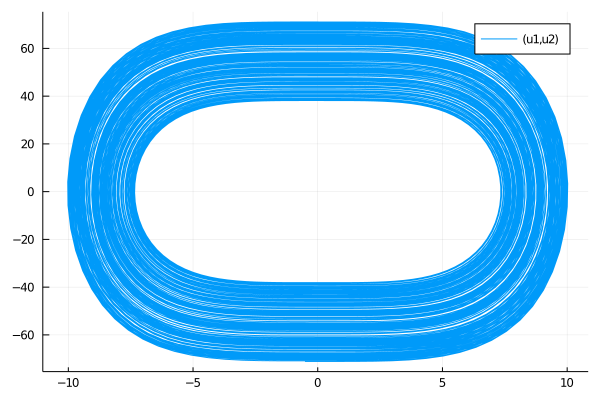

In [3]:
#u0=[1.0,1.0]
u0=rand(4,4)*10.0
tspan = (0.0,100.0)
prob = ODEProblem(ripa1!,u0,tspan)
sol=solve(prob)
plot(sol,vars=(1,2))

In [4]:
function ripa2!(du,u,p,t)
 du[1]=u[3]+p[1]*u[2]
 du[2]=u[4]-p[1]*u[1]
 du[3]=p[1]*u[4]-(p[1]^2 - p[2]^2)*u[1]
 du[4]=-p[1]*u[3]-(p[1]^2 - p[2]^2)*u[2]
end

ripa2! (generic function with 1 method)

In [5]:
#import Pkg; Pkg.add("WebIO")
using Interact,WebIO
#WebIO.install_jupyter_labextension(condajl=true)

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-13620884852569977720\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-14555029843096878708\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-13620884852569977720\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [48]:
#using Interact 
#@manipulate 
#for p1=-1.0:0.1:1.0#p2=-1.:0.1:1.0  
p1=1.0
    f(u,p,t)=
    u0=[1.0]
#u0=[0.01,0.1,0.01,0.01]
#    p=[p1,-1,0]
    tspan = (0.0,100.0)
 #prob = ODEProblem(ripa2!,u0,tspan,p)
    prob = ODEProblem(f,u0,tspan)
    sol=solve(prob)
    plot(sol)
    #plot(sol,vars=(1,2))
#end

LoadError: MethodError: no method matching sqrt(::Array{Float64,1})
Closest candidates are:
  sqrt(!Matched::BigFloat) at mpfr.jl:565
  sqrt(!Matched::BigInt) at mpfr.jl:573
  sqrt(!Matched::Complex{Float16}) at math.jl:1145
  ...

In [24]:
using GeophysicalFlows

LoadError: ArgumentError: Package GeophysicalFlows not found in current path:
- Run `import Pkg; Pkg.add("GeophysicalFlows")` to install the GeophysicalFlows package.


In [8]:
using FourierFlows, Plots, Statistics, Printf, Random

using FFTW: irfft
using Statistics: mean
using Random: seed!

import GeophysicalFlows.SurfaceQG
import GeophysicalFlows.SurfaceQG: kinetic_energy, buoyancy_variance, buoyancy_dissipation

UndefVarError: UndefVarError: SurfaceQG not defined

In [9]:
# ## Choosing a device: CPU or GPU

dev = CPU()    # Device (CPU/GPU)
nothing # hide


# ## Numerical parameters and time-stepping parameters

      n = 256                       # 2D resolution = n²
stepper = "FilteredETDRK4"          # timestepper
     dt = 0.03                      # timestep
     tf = 60                        # length of time for simulation
 nsteps = Int(tf / dt)              # total number of time-steps
 nsubs  = round(Int, nsteps/100)    # number of time-steps for intermediate logging/plotting (nsteps must be multiple of nsubs)
nothing # hide

In [11]:
# ## Physical parameters

  L = 2π        # domain size
 nν = 4
  ν = 1e-19
nothing # hide
#
## Problem setup
# We initialize a `Problem` by providing a set of keyword arguments. In this
# example numerical instability due to accumulation of buoyancy variance at high
# wavenumbers is taken care with the `FilteredTimestepper` we picked.
prob = SurfaceQG.Problem(dev; nx=n, Lx=L, dt=dt, stepper=stepper, ν=ν, nν=nν)
nothing # hide

# Let's define some shortcuts.
sol, clock, vars, params, grid = prob.sol, prob.clock, prob.vars, prob.params, prob.grid
x, y = grid.x, grid.y
nothing # hide


# ## Setting initial conditions
#
# We initialize the buoyancy equation with an elliptical vortex.
X, Y = gridpoints(grid)
b₀ = @. exp(-(X^2 + 4*Y^2))

SurfaceQG.set_b!(prob, b₀)
nothing # hide

UndefVarError: UndefVarError: SurfaceQG not defined

In [12]:
# Let's plot the initial condition.
heatmap(x, y, prob.vars.b',
     aspectratio = 1,
               c = :deep,
            clim = (0, 1),
           xlims = (-grid.Lx/2, grid.Lx/2),
           ylims = (-grid.Ly/2, grid.Ly/2),
          xticks = -3:3,
          yticks = -3:3,
          xlabel = "x",
          ylabel = "y",
           title = "buoyancy bₛ",
      framestyle = :box)


ErrorException: type ODEProblem has no field vars

In [13]:
# Create Diagnostics; `buoyancy_variance`, `kinetic_energy` and `buoyancy_dissipation` 
# functions were imported at the top.
B  = Diagnostic(buoyancy_variance, prob; nsteps=nsteps)
KE = Diagnostic(kinetic_energy, prob; nsteps=nsteps)
Dᵇ = Diagnostic(buoyancy_dissipation, prob; nsteps=nsteps)
diags = [B, KE, Dᵇ] # A list of Diagnostics types passed to `stepforward!`. Diagnostics are updated every timestep.
nothing # hidenothing # hide

UndefVarError: UndefVarError: buoyancy_variance not defined

In [15]:
# ## Output

# We choose folder for outputing `.jld2` files and snapshots (`.png` files).
# Define base filename so saved data can be distinguished from other runs
base_filename = string("SurfaceQG_decaying_n_", n)
# We choose folder for outputing `.jld2` files and snapshots (`.png` files).
datapath = "./"
plotpath = "./"

dataname = joinpath(datapath, base_filename)
plotname = joinpath(plotpath, base_filename)
nothing # hide

# Do some basic file management,
if !isdir(plotpath); mkdir(plotpath); end
if !isdir(datapath); mkdir(datapath); end
nothing # hide
# Do some basic file management,
if !isdir(plotpath); mkdir(plotpath); end
if !isdir(datapath); mkdir(datapath); end
nothing # hide

# and then create Output.
get_sol(prob) = sol # extracts the Fourier-transformed solution
get_u(prob) = irfft(im * grid.l .* sqrt.(grid.invKrsq) .* sol, grid.nx)
out = Output(prob, dataname, (:sol, get_sol), (:u, get_u))
nothing # hide

MethodError: MethodError: Cannot `convert` an object of type 
  ODEProblem{Array{Float64,1},Tuple{Float64,Float64},true,Array{Float64,1},ODEFunction{true,typeof(ripa2!),LinearAlgebra.UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing},Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}},DiffEqBase.StandardODEProblem} to an object of type 
  FourierFlows.Problem
Closest candidates are:
  convert(::Type{T}, !Matched::T) where T at essentials.jl:171

In [ ]:
# ## Visualizing the simulation

# We define a function that plots the buoyancy field and the time evolution of
# kinetic energy and buoyancy variance.

function plot_output(prob)
  bₛ = prob.vars.b
  uₛ = prob.vars.u
  vₛ = prob.vars.v

  pbₛ = heatmap(x, y, bₛ',
       aspectratio = 1,
                 c = :deep,
              clim = (0, 1),
             xlims = (-grid.Lx/2, grid.Lx/2),
             ylims = (-grid.Ly/2, grid.Ly/2),
            xticks = -3:3,
            yticks = -3:3,
            xlabel = "x",
            ylabel = "y",
             title = "buoyancy bₛ",
        framestyle = :box)

  pKE = plot(1,
             label = "kinetic energy ∫½(uₛ²+vₛ²)dxdy/L²",
         linewidth = 2,
            legend = :bottomright,
             alpha = 0.7,
             xlims = (0, tf),
             ylims = (0, 1e-2),
            xlabel = "t")

  pb² = plot(1,
             label = "buoyancy variance ∫bₛ²dxdy/L²",
         linecolor = :red,
            legend = :bottomright,
         linewidth = 2,
             alpha = 0.7,
             xlims = (0, tf),
             ylims = (0, 2e-2),
            xlabel = "t")

  layout = @layout [a{0.5w} Plots.grid(2, 1)]
  p = plot(pbₛ, pKE, pb², layout=layout, size = (900, 500), dpi=150)

  return p
end
nothing # hide


# ## Time-stepping the `Problem` forward and create animation by updating the plot.

startwalltime = time()

p = plot_output(prob)

anim = @animate for j=0:Int(nsteps/nsubs)

  cfl = clock.dt * maximum([maximum(vars.u) / grid.dx, maximum(vars.v) / grid.dy])

  if j%(500/nsubs)==0
    log1 = @sprintf("step: %04d, t: %.1f, cfl: %.3f, walltime: %.2f min",
          clock.step, clock.t, cfl, (time()-startwalltime)/60)
    log2 = @sprintf("buoyancy variance: %.2e, buoyancy variance dissipation: %.2e",
              B.data[B.i], Dᵇ.data[Dᵇ.i])
    println(log1)
    println(log2)
  end

  p[1][1][:z] = vars.b
  p[1][:title] = "buoyancy, t="*@sprintf("%.2f", clock.t)
  push!(p[2][1], KE.t[KE.i], KE.data[KE.i])
  push!(p[3][1], B.t[B.i], B.data[B.i])

  stepforward!(prob, diags, nsubs)
  SurfaceQG.updatevars!(prob)

end

mp4(anim, "sqg_ellipticalvortex.mp4", fps=14)

# Let's see how all flow fields look like at the end of the simulation.

pu = heatmap(x, y, vars.u',
     aspectratio = 1,
               c = :balance,
            clim = (-maximum(abs.(vars.u)), maximum(abs.(vars.u))),
           xlims = (-L/2, L/2),
           ylims = (-L/2, L/2),
          xticks = -3:3,
          yticks = -3:3,
          xlabel = "x",
          ylabel = "y",
           title = "uₛ(x, y, t="*@sprintf("%.2f", clock.t)*")",
      framestyle = :box)

pv = heatmap(x, y, vars.v',
     aspectratio = 1,
               c = :balance,
            clim = (-maximum(abs.(vars.v)), maximum(abs.(vars.v))),
           xlims = (-L/2, L/2),
           ylims = (-L/2, L/2),
          xticks = -3:3,
          yticks = -3:3,
          xlabel = "x",
          ylabel = "y",
           title = "vₛ(x, y, t="*@sprintf("%.2f", clock.t)*")",
      framestyle = :box)

pb = heatmap(x, y, vars.b',
     aspectratio = 1,
               c = :deep,
            clim = (0, 1),
           xlims = (-L/2, L/2),
           ylims = (-L/2, L/2),
          xticks = -3:3,
          yticks = -3:3,
          xlabel = "x",
          ylabel = "y",
           title = "bₛ(x, y, t="*@sprintf("%.2f", clock.t)*")",
      framestyle = :box)

layout = @layout [a{0.5h}; b{0.5w} c{0.5w}]

plot_final = plot(pb, pu, pv, layout=layout, size = (800, 800))

# Last we can save the output by calling `saveoutput(out)`.
